In [1]:
import scanpy as sc
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats
import numpy as np
import seaborn as sns
import bbknn

In [2]:
import sys
sys.path.insert(0, "../lib")
import sc_utils

In [4]:
mpl.rcParams["font.family"] = "Arial"
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams["figure.figsize"] = (16, 12)
pd.set_option('display.max_rows', 500)

In [4]:
ds_full = sc.read_h5ad("../data/02dataset/integrated-manual.h5ad")

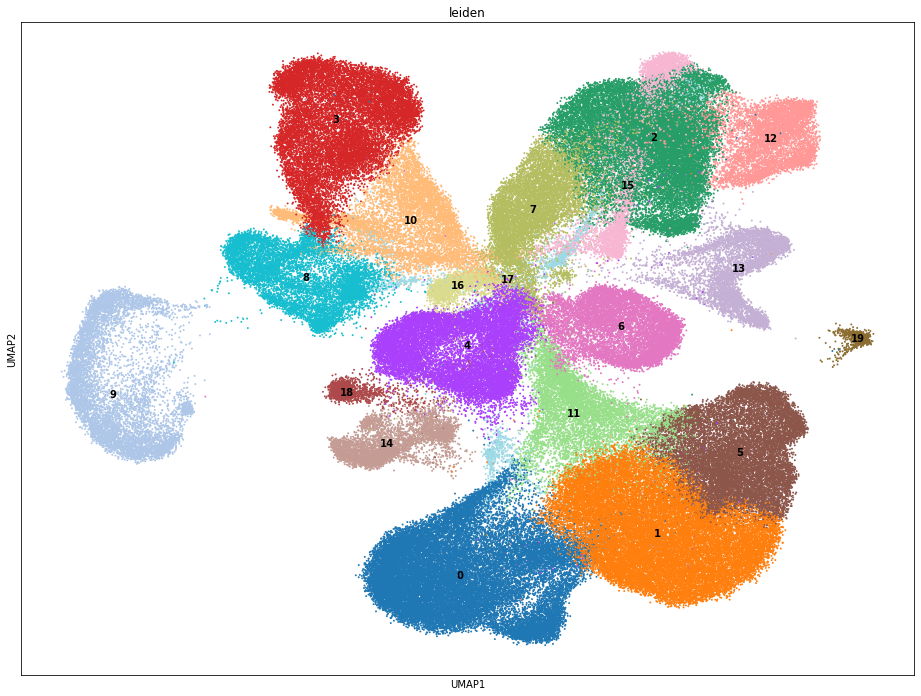

In [5]:
sc.pl.umap(ds_full, color="leiden", size=15, legend_loc="on data")

## Subset only on Endothelial clusters

In [6]:
endothelial_clusters = ["4", "16"]

In [7]:
ds = ds_full[ds_full.obs.leiden.isin(endothelial_clusters), :].copy()

In [8]:
ds.obs["COVID-19"] = ds.obs["COVID-19"].astype("category")

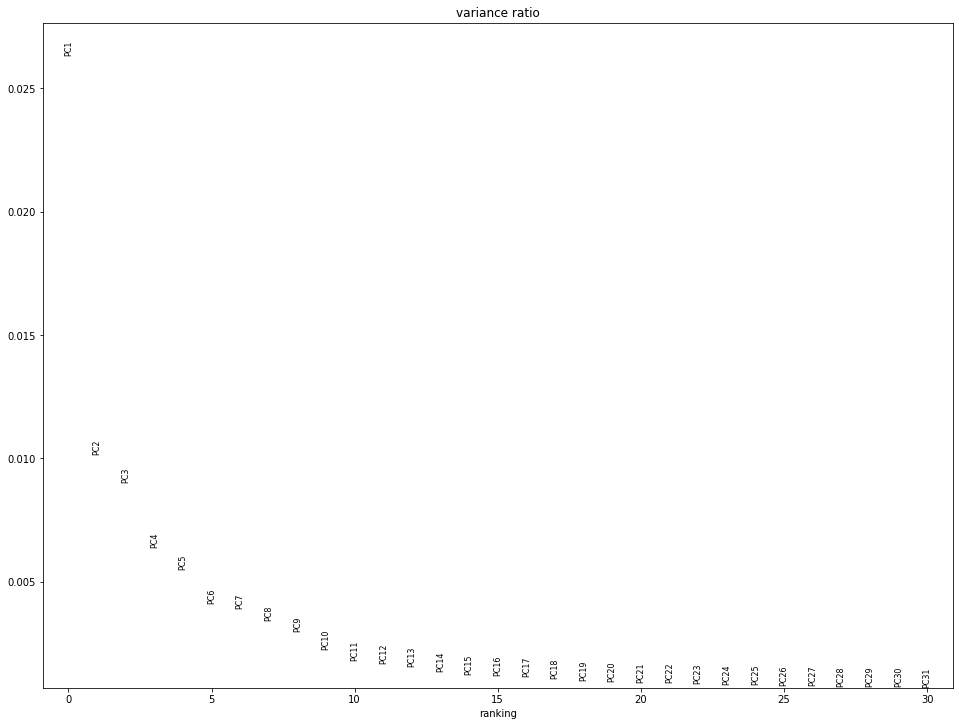

In [9]:
ds = ds.raw.to_adata()
sc.pp.highly_variable_genes(ds, n_top_genes=3000, batch_key="orig.ident")
ds.raw = ds

sc.pp.scale(ds)
sc.tl.pca(ds, svd_solver="arpack")
sc.pl.pca_variance_ratio(ds)

In [10]:
bbknn.bbknn(ds, neighbors_within_batch=int(50 / ds.obs.batch.unique().size), n_pcs=15)

In [11]:
sc.tl.leiden(ds, resolution=0.5)
sc.tl.umap(ds)

In [12]:
ax = sc.pl.umap(
    ds, 
    color="leiden", 
    size=15, 
    legend_loc="on data", 
    show=False, 
    legend_fontsize=12, 
    legend_fontweight="normal",
    legend_fontoutline=5
)

In [ ]:
ax = sc.pl.umap(
    ds, 
    color="Sample Name", 
    size=15, 
    show=False, 
    legend_fontsize=12, 
    legend_fontweight="normal",
    legend_fontoutline=5
)

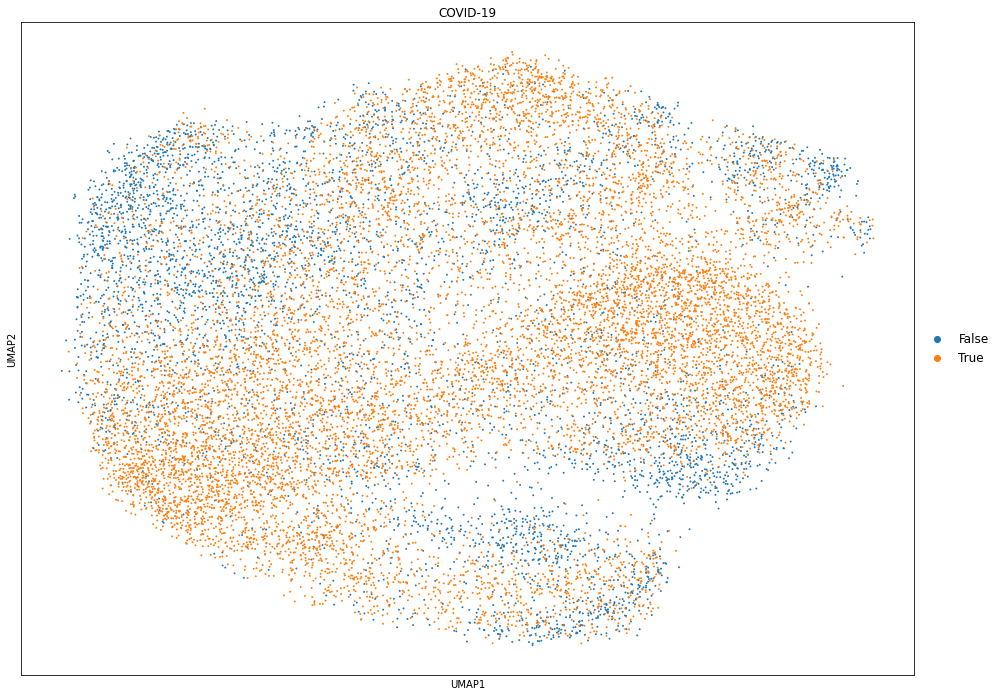

In [14]:
ax = sc.pl.umap(
    ds, 
    color="COVID-19", 
    size=15, 
    show=False, 
    legend_fontsize=12, 
    legend_fontweight="normal",
    legend_fontoutline=5
)

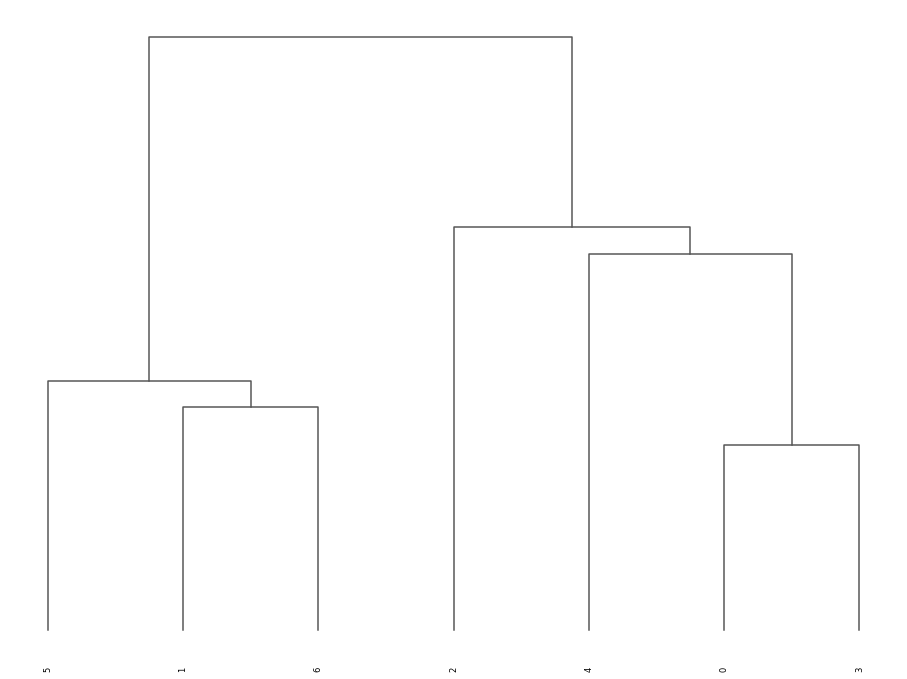

In [15]:
sc.tl.dendrogram(ds, groupby="leiden")
sc.pl.dendrogram(ds, groupby="leiden")

In [16]:
sc.tl.rank_genes_groups(ds, "leiden", method="wilcoxon", n_genes=0)
markers = sc_utils.get_markers(ds, "leiden")

## Marker genes for clusters

In [17]:
markers.groupby("cluster").head(20)

p_val  avg_logFC     pct.1     pct.2      p_val_adj cluster  \
0        0.000000e+00   1.333796  0.876706  0.372363   0.000000e+00       0   
1        0.000000e+00   1.374632  0.870441  0.377283   0.000000e+00       0   
2        0.000000e+00   1.255231  0.871783  0.364857   0.000000e+00       0   
3        0.000000e+00   1.477912  0.864399  0.389292   0.000000e+00       0   
4        0.000000e+00   1.425254  0.869993  0.397298   0.000000e+00       0   
5        0.000000e+00   1.348140  0.855001  0.374031   0.000000e+00       0   
6        0.000000e+00   1.301846  0.862833  0.391961   0.000000e+00       0   
7        0.000000e+00   1.193753  0.835534  0.427821   0.000000e+00       0   
8        0.000000e+00   1.267512  0.825912  0.454508   0.000000e+00       0   
9        0.000000e+00   1.367388  0.839338  0.470520   0.000000e+00       0   
10       0.000000e+00   0.866623  0.790333  0.520057   0.000000e+00       0   
11      7.413344e-171   1.131637  0.613336  0.495538  7.413344e-171       0   
12      4.635949e-158   1.107089  0.627433  0.505713  4.635949e-158       0   
13      9.138922e-123   0.630530  0.700157  0.561755  9.138922e-123       0   
14       4.436506e-48   1.261641  0.388230  0.329080   4.436506e-48       0   
15       3.485547e-44   1.069608  0.490490  0.351514   3.485547e-44       0   
16       1.672561e-24   0.970611  0.364735  0.336669   1.672561e-24       0   
17       1.221697e-20   0.869593  0.326695  0.287215   1.221697e-20       0   
18       8.057922e-20   0.835575  0.322667  0.281711   8.057922e-20       0   
19       5.975004e-17   0.734272  0.318416  0.278542   5.975004e-17       0   
26214    0.000000e+00   3.852273  0.900349  0.285409   0.000000e+00       1   
26215    0.000000e+00   1.397813  0.911059  0.509988   0.000000e+00       1   
26216    0.000000e+00   2.666200  0.931315  0.466831   0.000000e+00       1   
26217    0.000000e+00   1.387204  0.911059  0.486889   0.000000e+00       1   
26218    0.000000e+00   3.638983  0.772061  0.170736   0.000000e+00       1   
26219    0.000000e+00   2.515101  0.871711  0.391697   0.000000e+00       1   
26220    0.000000e+00   2.581228  0.812340  0.256967   0.000000e+00       1   
26221    0.000000e+00   2.787429  0.799767  0.368352   0.000000e+00       1   
26222    0.000000e+00   2.174037  0.906636  0.519770   0.000000e+00       1   
26223    0.000000e+00   2.386873  0.824447  0.474558   0.000000e+00       1   
26224    0.000000e+00   3.123461  0.673574  0.136293   0.000000e+00       1   
26225    0.000000e+00   4.038040  0.616997  0.090259   0.000000e+00       1   
26226    0.000000e+00   2.651224  0.692200  0.178874   0.000000e+00       1   
26227    0.000000e+00   2.121958  0.856345  0.408056   0.000000e+00       1   
26228    0.000000e+00   2.114273  0.862631  0.406987   0.000000e+00       1   
26229    0.000000e+00   2.481637  0.715017  0.203617   0.000000e+00       1   
26230    0.000000e+00   3.293234  0.611176  0.117304   0.000000e+00       1   
26231    0.000000e+00   1.998583  0.868685  0.439457   0.000000e+00       1   
26232    0.000000e+00   1.900467  0.846799  0.520674   0.000000e+00       1   
26233    0.000000e+00   2.006422  0.848661  0.395890   0.000000e+00       1   
52428    0.000000e+00   1.008496  0.896789  0.498881   0.000000e+00       2   
52429    0.000000e+00   2.896154  0.830603  0.395361   0.000000e+00       2   
52430    0.000000e+00   3.363735  0.793906  0.308323   0.000000e+00       2   
52431    0.000000e+00   1.847651  0.895478  0.550716   0.000000e+00       2   
52432    0.000000e+00   1.565535  0.889581  0.575850   0.000000e+00       2   
52433    0.000000e+00   3.278645  0.660550  0.166020   0.000000e+00       2   
52434    0.000000e+00   2.666837  0.701507  0.265662   0.000000e+00       2   
52435    0.000000e+00   1.370769  0.875491  0.577342   0.000000e+00       2   
52436    0.000000e+00   1.903411  0.871232  0.549597   0.000000e+00       2   
52437    0.000000e+00   1.287289  0.850262  0.571599   0.000000e+0

In [18]:
markers["pct.diff"] = markers["pct.1"] - markers["pct.2"]

In [19]:
markers[markers["pct.diff"] > 0.6]

p_val  avg_logFC     pct.1     pct.2      p_val_adj cluster  \
26214    0.000000e+00   3.852273  0.900349  0.285409   0.000000e+00       1   
26218    0.000000e+00   3.638983  0.772061  0.170736   0.000000e+00       1   
104856   0.000000e+00   7.315209  0.933991  0.109563   0.000000e+00       4   
104857   0.000000e+00   6.893980  0.886950  0.047748   0.000000e+00       4   
104860   0.000000e+00   4.951512  0.679818  0.058381   0.000000e+00       4   
131070   0.000000e+00   6.096159  0.779080  0.035503   0.000000e+00       5   
131075  5.216057e-266   3.789340  0.737601  0.125269  5.216057e-266       5   
131076  2.266898e-262   4.327222  0.694319  0.076021  2.266898e-262       5   
157285  4.457789e-289   3.974282  0.936288  0.198628  4.457789e-289       6   
157286  5.574771e-283   4.167885  0.939058  0.174164  5.574771e-283       6   
157287  4.005915e-278   4.105716  0.933518  0.179057  4.005915e-278       6   
157289  3.254985e-254   4.571183  0.835180  0.077519  3.254985e-254       6   
157290  5.147359e-249   4.146492  0.872576  0.129559  5.147359e-249       6   
157291  2.099670e-248   4.412259  0.835180  0.082348  2.099670e-248       6   
157292  5.724312e-227   3.440206  0.883657  0.165205  5.724312e-227       6   
157293  7.834999e-225   4.046006  0.810249  0.087368  7.834999e-225       6   
157295  6.474671e-210   3.821297  0.793629  0.101474  6.474671e-210       6   
157297  4.105057e-201   2.994238  0.875346  0.216737  4.105057e-201       6   
157298  1.430084e-192   3.500903  0.831025  0.222709  1.430084e-192       6   
157302  1.574385e-185   4.173615  0.706371  0.049434  1.574385e-185       6   
157304  3.155094e-180   4.086121  0.713296  0.071419  3.155094e-180       6   
157305  2.163380e-179   3.675423  0.725762  0.079680  2.163380e-179       6   
157309  9.938503e-175   3.393208  0.779778  0.145381  9.938503e-175       6   
157311  2.235055e-171   3.870240  0.695291  0.059919  2.235055e-171       6   
157312  1.111191e-169   3.782939  0.720222  0.101538  1.111191e-169       6   
157313  3.004953e-169   3.061916  0.788089  0.178295  3.004953e-169       6   
157317  3.019318e-158   4.307837  0.642659  0.037552  3.019318e-158       6   
157318  5.968308e-157   3.485915  0.689751  0.080569  5.968308e-157       6   
157319  2.949014e-156   4.202149  0.638504  0.036409  2.949014e-156       6   

            gene  pct.diff  
26214      ACKR1  0.614940  
26218         C7  0.601325  
104856     CCL21  0.824428  
104857      TFF3  0.839202  
104860     PROX1  0.621437  
131070      DKK2  0.743578  
131075      HEY1  0.612333  
131076      GJA5  0.618298  
157285      CTSS  0.737661  
157286    TYROBP  0.764894  
157287    FCER1G  0.754461  
157289     CD163  0.757661  
157290       LYZ  0.743017  
157291     MS4A7  0.752832  
157292    LAPTM5  0.718451  
157293      AIF1  0.722881  
157295      CD68  0.692155  
157297     ASAH1  0.658610  
157298      C1QA  0.608316  
157302     PTPRC  0.656937  
157304     GPNMB  0.641877  
157305      CD44  0.646082  
157309      MRC1  0.634398  
157311  C1orf162  0.635372  
157312      C1QC  0.618684  
157313      CTSC  0.609794  
157317      CYBB  0.605107  
157318      CAPG  0.609181  
157319      LCP1  0.602095

## Violin plot for my collection of endothelial marker genes

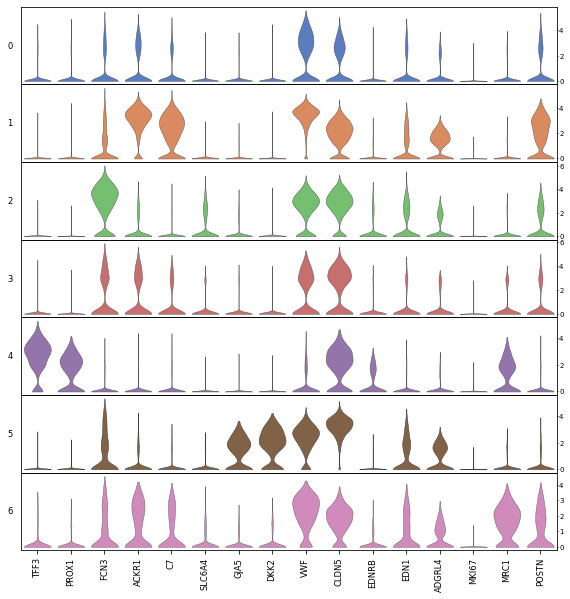

In [27]:
genes = [
    "TFF3", "PROX1", "FCN3", "ACKR1", "C7", "SLC6A4", 
    "GJA5", "DKK2", "VWF", "CLDN5", "EDNRB", "EDN1", "ADGRL4",
    "MKI67", "MRC1", "POSTN"
]
ax = sc.pl.stacked_violin(
    ds,
    genes,
    groupby="leiden",
    rotation=90,
    figsize=(10, 10),
    show=False
);

## Name clusters

Names mostly from here http://cells.ucsc.edu/?ds=stanford-czb-hlca%2Fdroplet&gene=ADGRL4

In [28]:
names = pd.Series([
    "Endothelial-1", # 0 
    "Bronchial vessel", # 1 
    "Capillary", # 2 
    "Endothelial-2", # 3 
    "Lymphatic", # 4 
    "Artery", # 5
    "Doublets", # 6 
])

In [29]:
ds.obs["cluster"] = names[ds.obs.leiden.astype(int)].values

... storing 'cluster' as categorical


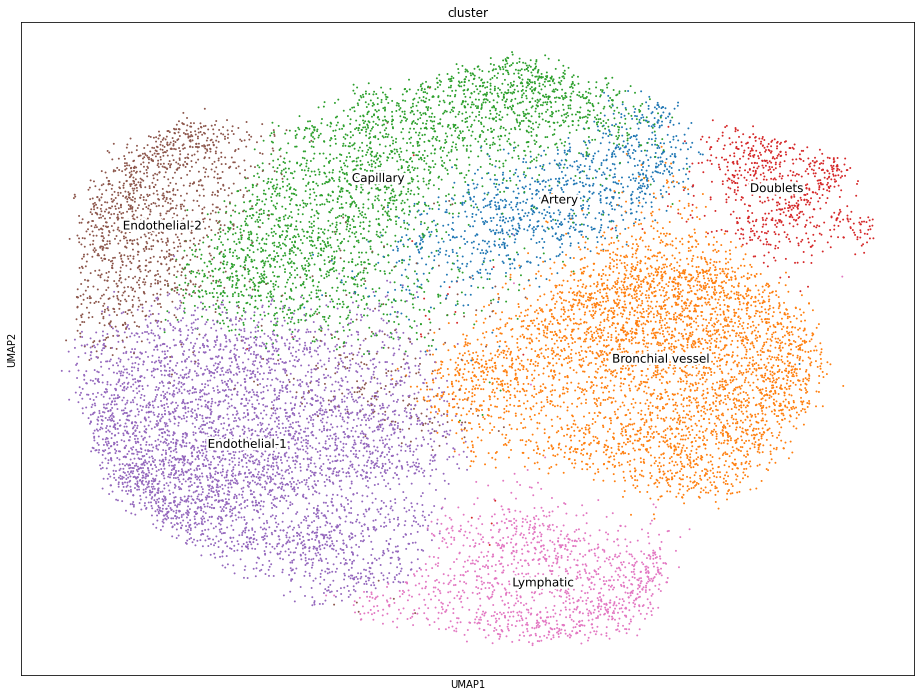

In [30]:
ax = sc.pl.umap(
    ds, 
    color="cluster", 
    size=15, 
    show=False, 
    legend_loc="on data",
    legend_fontsize=12, 
    legend_fontweight="normal",
    legend_fontoutline=5
)

In [31]:
sc_utils.plot_composition(ds, "cluster", "COVID-19")

Composition is pretty equal with the exception of `Endothelial-1` and `Bronchial vessel` clusters

In [ ]:
sc_utils.plot_composition(ds, "cluster", "Sample Name")

## Doublets

In [6]:
dbl_thresholds = {
    "Sample_1": 0.22,
    "Sample_2": 0.3,
    "Sample_3": 0.35,
    "Sample_4": 0.37,
    "Sample_5": 0.4,
    "Sample_6": 0.25,
    "Sample_7": 0.26,
    "Sample_8": 0.41,
    "Sample_9": 0.38,
    "Sample_10": 0.25,
    "Sample_11": 0.4,
    "Sample_12": 0.37,
    "Sample_13": 0.34,
    "Sample_14": 0.38,
    "Sample_15": 0.33,
    "Sample_16": 0.4,
    "Sample_17": 0.38,
    "Sample_18": 0.39,
    "Sample_19": 0.4,
    "Sample_20": 0.4,
    "Sample_21": 0.28,
    "Sample_22": 0.28
}

In [ ]:
doublets = []
for sample, threshold in dbl_thresholds.items():
    batch_num = ds.obs.batch.loc[ds.obs["orig.ident"] == sample].values[0]
    scores = pd.read_csv(f"doublets/{sample}_doublets.csv", index_col=0)
    sample_doublets = "0_" + scores["0"].loc[scores.doublet > threshold].str.replace("\d+$", "") + batch_num
    doublets.append(sample_doublets)
    print(f"{sample} has {sample_doublets.size}")
doublets = pd.concat(doublets)
doublets.shape

In [8]:
ds.obs["doublet"] = False
ds.obs.doublet[ds.obs_names.isin(doublets)] = True
ds.obs.doublet = ds.obs.doublet.astype("category")
ds.obs.doublet.value_counts()

/projects/b1038/tools/pyenv/versions/3.6.9/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


False    16427
True        33
Name: doublet, dtype: int64

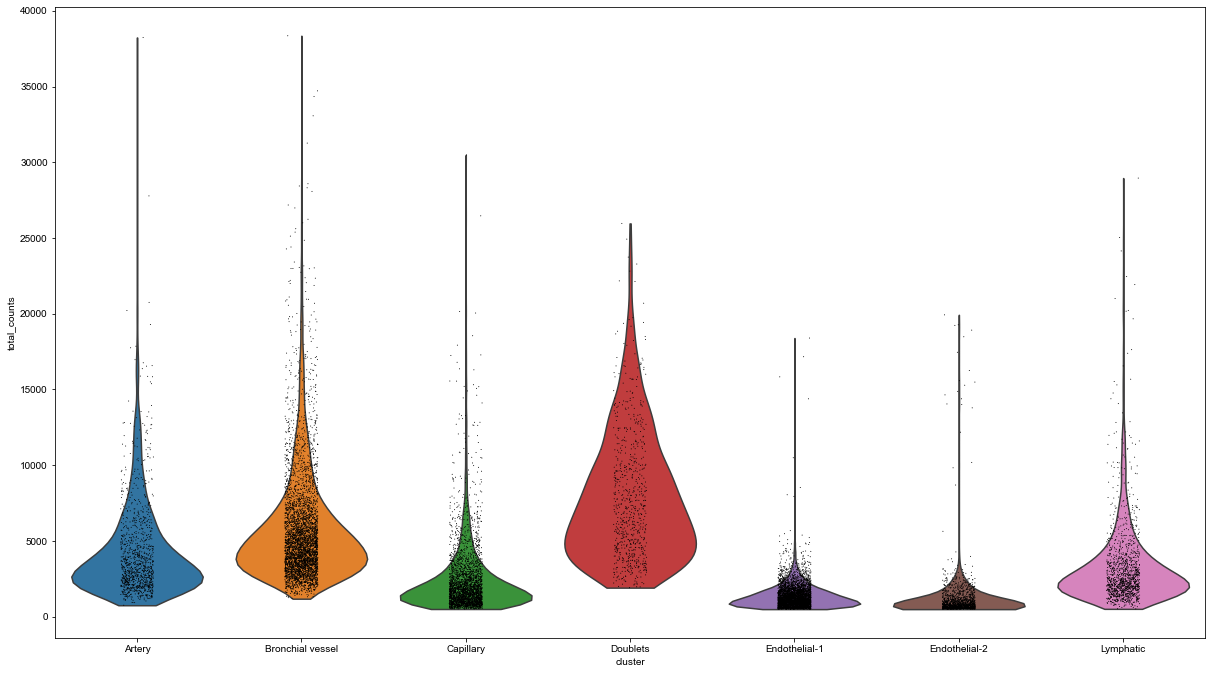

In [9]:
sc.pl.violin(ds, "total_counts", "cluster")

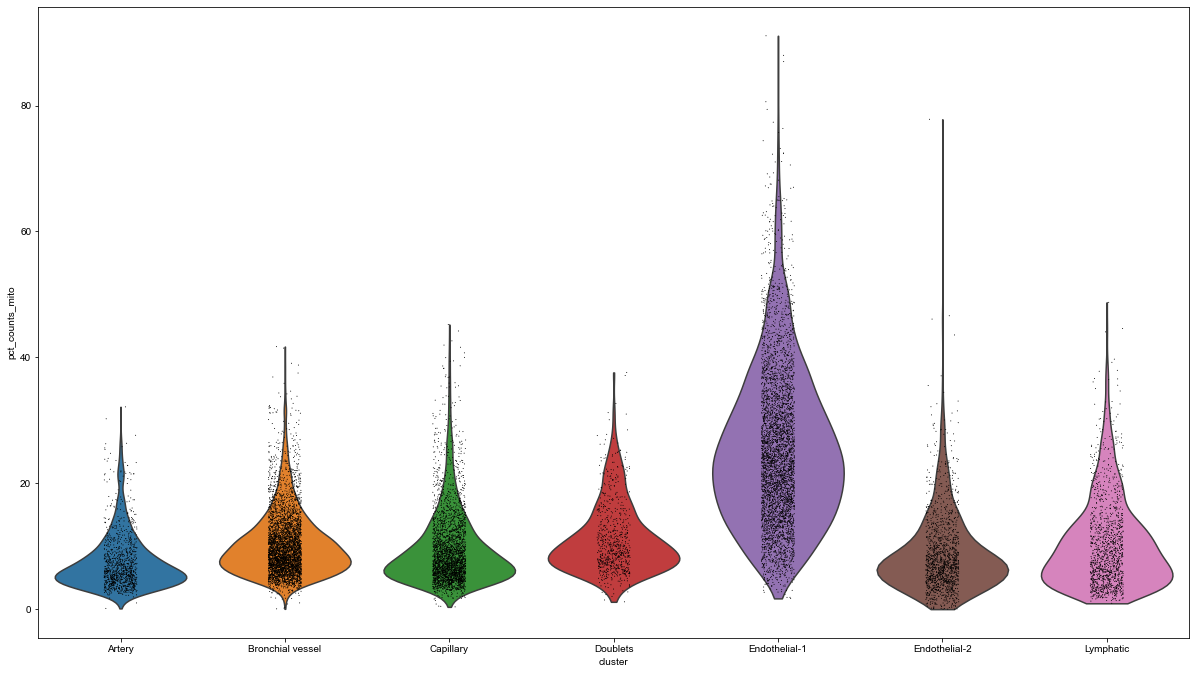

In [10]:
sc.pl.violin(ds, "pct_counts_mito", "cluster")

## Reprocess without doublets and low-q cells

In [11]:
ds2 = ds.raw.to_adata()

In [12]:
ds2 = ds2[~ds2.obs.doublet.astype(bool), :]

Trying to set attribute `.var` of view, copying.


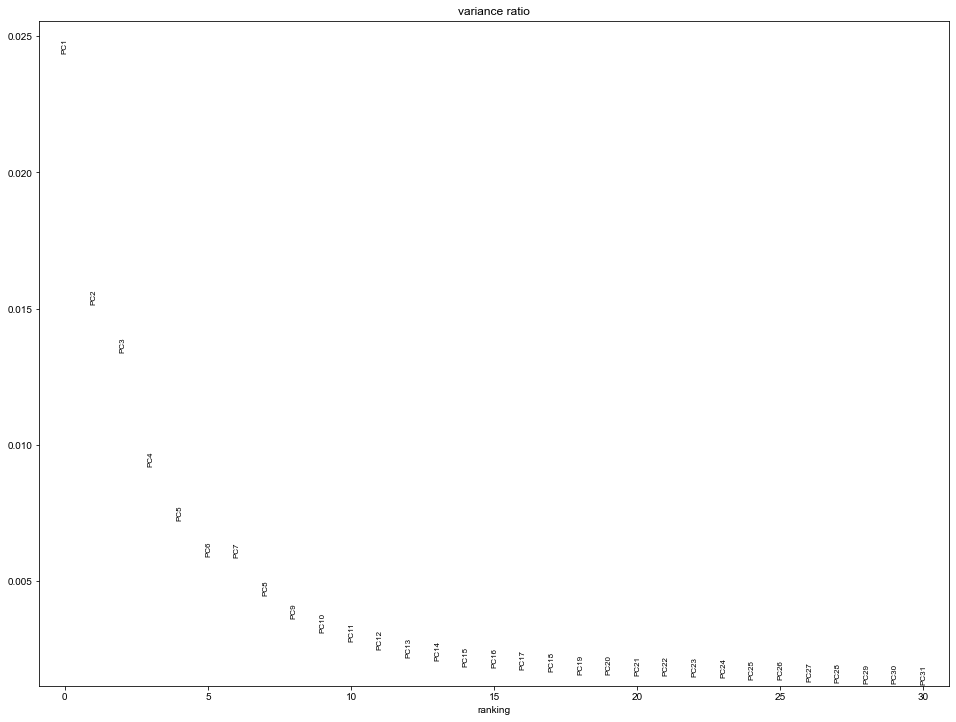

In [13]:
sc.pp.highly_variable_genes(ds2, n_top_genes=1500, batch_key="orig.ident")
ds2.raw = ds2

sc.pp.scale(ds2)
sc.tl.pca(ds2, svd_solver="arpack")
sc.pl.pca_variance_ratio(ds2)

In [14]:
bbknn.bbknn(ds2, neighbors_within_batch=int(75 / ds2.obs.batch.unique().size), n_pcs=10)

In [15]:
sc.tl.leiden(ds2, resolution=0.5)
sc.tl.umap(ds2)

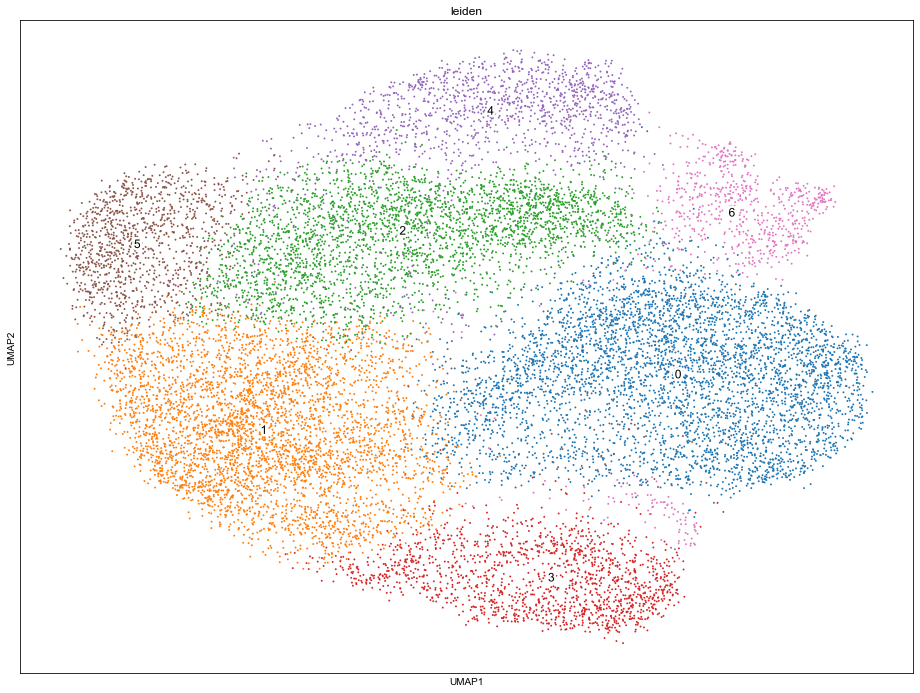

In [16]:
ax = sc.pl.umap(
    ds2, 
    color="leiden", 
    size=15, 
    legend_loc="on data", 
    show=False, 
    legend_fontsize=12, 
    legend_fontweight="normal",
    legend_fontoutline=5
)

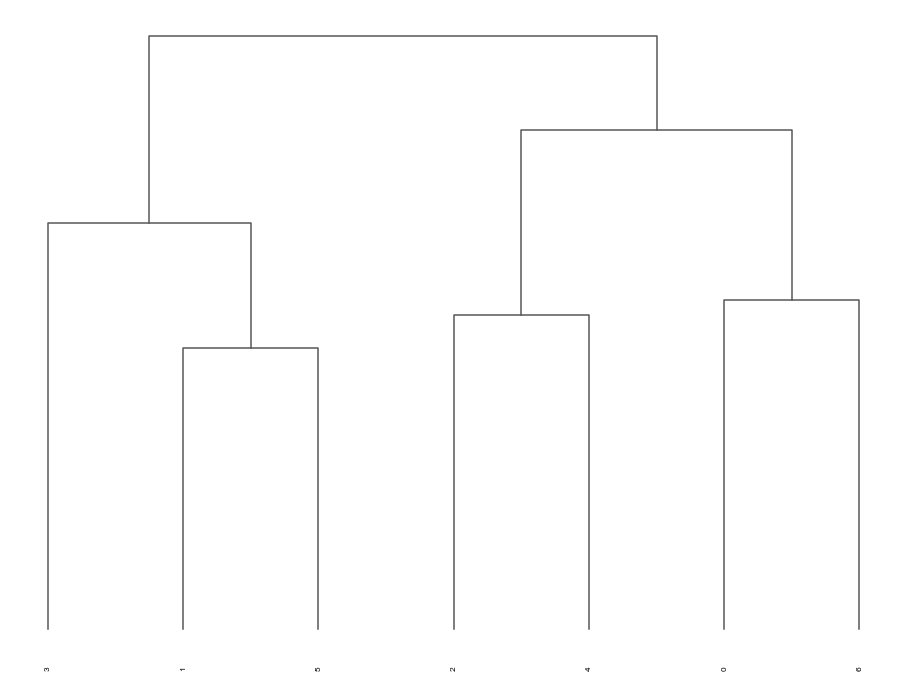

In [17]:
sc.tl.dendrogram(ds2, groupby="leiden")
sc.pl.dendrogram(ds2, groupby="leiden")

In [56]:
sc.tl.rank_genes_groups(ds2, "leiden", method="wilcoxon", n_genes=0)
markers = sc_utils.get_markers(ds2, "leiden")

In [57]:
markers.groupby("cluster").head(10)

p_val  avg_logFC     pct.1     pct.2      p_val_adj cluster  \
0        0.000000e+00   4.076288  0.919239  0.269298   0.000000e+00       0   
1        0.000000e+00   2.774235  0.942282  0.455716   0.000000e+00       0   
2        0.000000e+00   3.946527  0.789485  0.154470   0.000000e+00       0   
3        0.000000e+00   1.381831  0.901566  0.507485   0.000000e+00       0   
4        0.000000e+00   1.357562  0.901790  0.483817   0.000000e+00       0   
5        0.000000e+00   2.604932  0.879642  0.381701   0.000000e+00       0   
6        0.000000e+00   2.996866  0.817673  0.355022   0.000000e+00       0   
7        0.000000e+00   2.330974  0.918568  0.509660   0.000000e+00       0   
8        0.000000e+00   2.639870  0.804698  0.251150   0.000000e+00       0   
9        0.000000e+00   2.460461  0.832662  0.466338   0.000000e+00       0   
26214    0.000000e+00   1.320197  0.881847  0.386614   0.000000e+00       1   
26215    0.000000e+00   1.385118  0.879636  0.389446   0.000000e+00       1   
26216    0.000000e+00   1.482058  0.872022  0.401343   0.000000e+00       1   
26217    0.000000e+00   1.426783  0.876443  0.410003   0.000000e+00       1   
26218    0.000000e+00   1.234381  0.872267  0.380301   0.000000e+00       1   
26219    0.000000e+00   1.305708  0.870793  0.404095   0.000000e+00       1   
26220    0.000000e+00   1.304761  0.850651  0.390013   0.000000e+00       1   
26221    0.000000e+00   1.308921  0.837878  0.462366   0.000000e+00       1   
26222    0.000000e+00   1.212350  0.844019  0.437844   0.000000e+00       1   
26223    0.000000e+00   1.332476  0.839597  0.481790   0.000000e+00       1   
52428    0.000000e+00   3.067690  0.851575  0.389497   0.000000e+00       2   
52429    0.000000e+00   1.010256  0.900292  0.496853   0.000000e+00       2   
52430    0.000000e+00   3.524343  0.811952  0.302967   0.000000e+00       2   
52431    0.000000e+00   1.870294  0.900942  0.548846   0.000000e+00       2   
52432    0.000000e+00   2.009342  0.886327  0.545325   0.000000e+00       2   
52433    0.000000e+00   3.308419  0.664826  0.164144   0.000000e+00       2   
52434    0.000000e+00   1.497084  0.879182  0.577839   0.000000e+00       2   
52435    0.000000e+00   2.680002  0.703800  0.264085   0.000000e+00       2   
52436    0.000000e+00   1.310177  0.865866  0.578813   0.000000e+00       2   
52437    0.000000e+00   2.727259  0.620331  0.228424   0.000000e+00       2   
78642    0.000000e+00   7.523335  0.921138  0.097917   0.000000e+00       3   
78643    0.000000e+00   7.011790  0.839043  0.039583   0.000000e+00       3   
78644    0.000000e+00   3.393305  0.872657  0.320094   0.000000e+00       3   
78645    0.000000e+00   3.360112  0.817065  0.282661   0.000000e+00       3   
78646    0.000000e+00   5.183282  0.654169  0.051210   0.000000e+00       3   
78647   6.606899e-304   1.970179  0.910795  0.564583  6.606899e-304       3   
78648   1.801698e-270   4.870876  0.582418  0.037500  1.801698e-270       3   
78649   3.416842e-231   4.926147  0.537169  0.045430  3.416842e-231       3   
78650   2.296877e-223   3.279267  0.607628  0.164382  2.296877e-223       3   
78651   4.463772e-220   3.062500  0.623142  0.194556  4.463772e-220       3   
104856   0.000000e+00   6.347001  0.744453  0.028704   0.000000e+00       4   
104857   0.000000e+00   3.089282  0.820964  0.262103   0.000000e+00       4   
104858   0.000000e+00   2.526612  0.895945  0.470569   0.000000e+00       4   
104859   0.000000e+00   2.022045  0.914308  0.612235   0.000000e+00       4   
104860  4.820236e-288   4.428594  0.668707  0.070040  4.820236e-288       4   
104861  1.483103e-286   3.799785  0.706197  0.120040  1.483103e-286       4   
104862  5.012043e-282   2.149675  0.924254  0.559788  5.012043e-282       4   
104863  1.357659e-263   1.184072  0.925019  0.578373  1.357659e-263       4   
104864  2.959320e-262   3.018272  0.813313  0.245899  2.959320e-262       4   
104865  5.040781e-243   1.490459  0.938791  0.620437  5.040781e-24

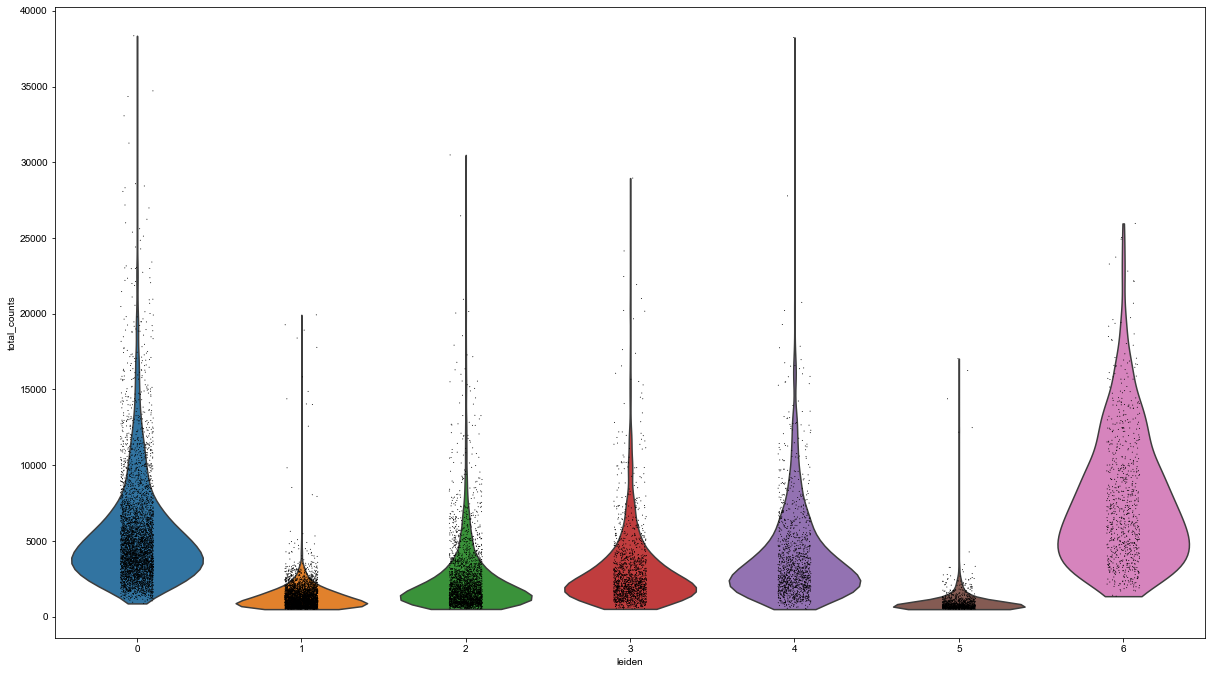

In [18]:
sc.pl.violin(ds2, "total_counts", "leiden")

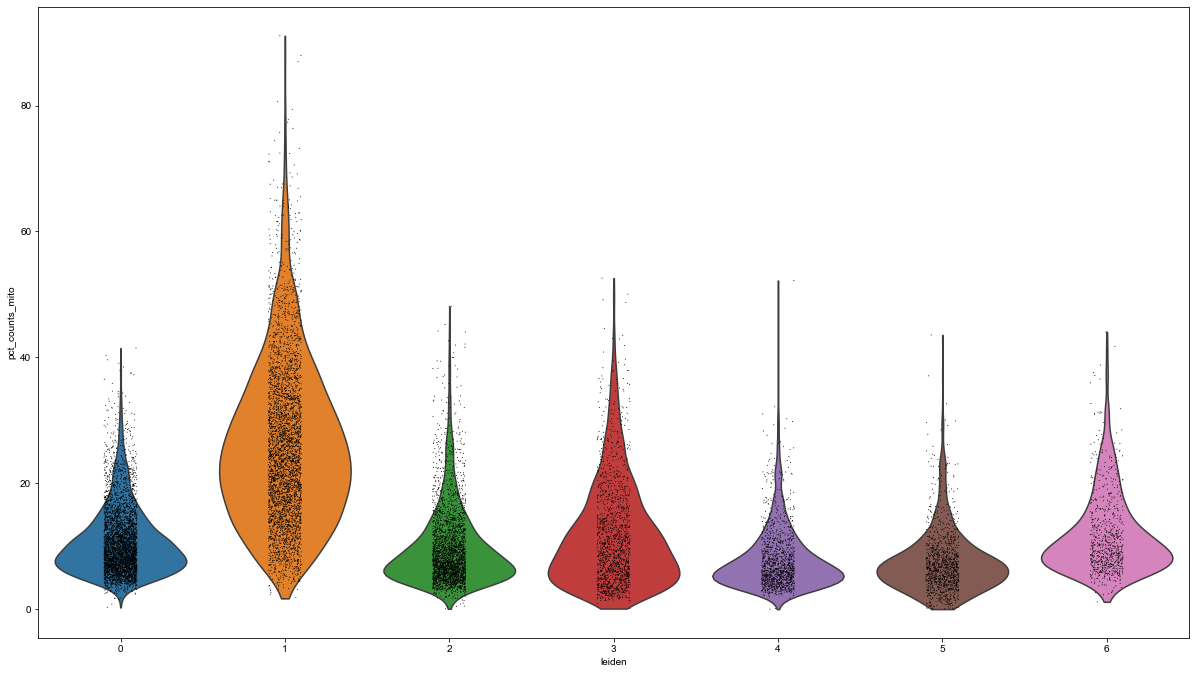

In [19]:
sc.pl.violin(ds2, "pct_counts_mito", "leiden")

## Without low-q cells

In [39]:
ds3 = ds2.raw.to_adata()

In [40]:
ds3 = ds3[ds3.obs.pct_counts_mito < 35, :]

In [41]:
orig_ident_values = ds3.obs["orig.ident"].value_counts()
to_remove = orig_ident_values[orig_ident_values < 10].index
ds3 = ds3[~ds3.obs["orig.ident"].isin(to_remove), :]

Trying to set attribute `.var` of view, copying.


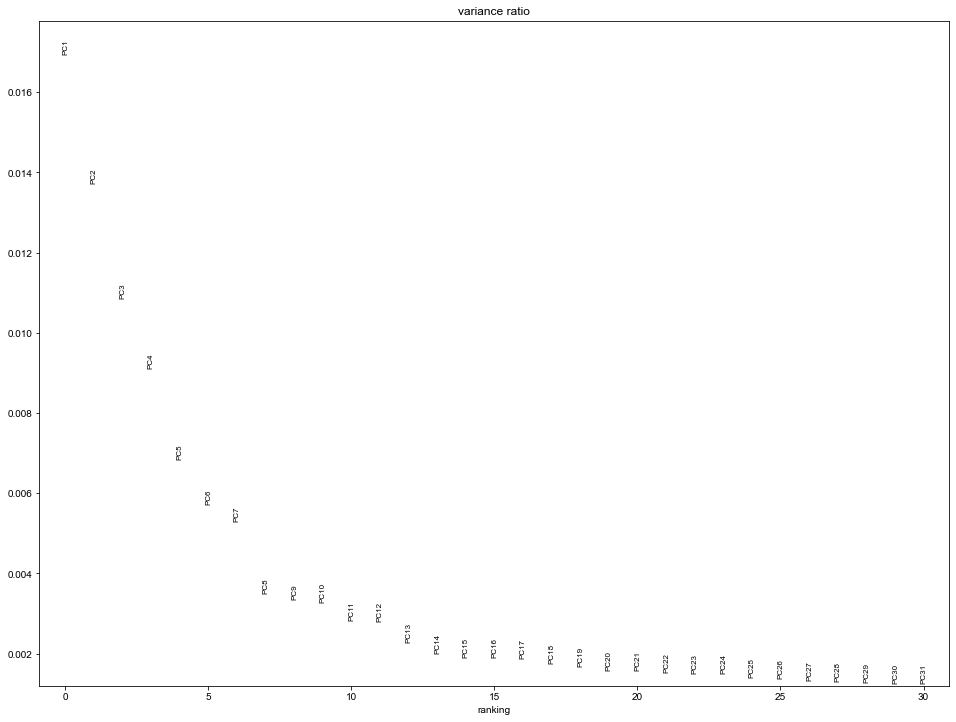

In [42]:
sc.pp.highly_variable_genes(ds3, n_top_genes=1500, batch_key="orig.ident")
ds3.raw = ds3

sc.pp.scale(ds3)
sc.tl.pca(ds3, svd_solver="arpack")
sc.pl.pca_variance_ratio(ds3)

In [43]:
bbknn.bbknn(ds3, neighbors_within_batch=int(50 / ds3.obs.batch.unique().size), n_pcs=10)

In [44]:
sc.tl.leiden(ds3, resolution=0.5)
sc.tl.umap(ds3)

In [45]:
ax = sc.pl.umap(
    ds3, 
    color="leiden", 
    size=15, 
    legend_loc="on data", 
    show=False, 
    legend_fontsize=12, 
    legend_fontweight="normal",
    legend_fontoutline=5
)

In [46]:
sc.tl.rank_genes_groups(ds3, "leiden", method="wilcoxon", n_genes=0)
markers = sc_utils.get_markers(ds3, "leiden")

In [49]:
markers.groupby("cluster").head(10)

p_val  avg_logFC     pct.1     pct.2      p_val_adj cluster  \
0        0.000000e+00   3.888460  0.906809  0.280284   0.000000e+00       0   
1        0.000000e+00   4.047960  0.799907  0.157261   0.000000e+00       0   
2        0.000000e+00   2.561263  0.920288  0.467110   0.000000e+00       0   
3        0.000000e+00   3.040847  0.823379  0.359633   0.000000e+00       0   
4        0.000000e+00   2.265019  0.913316  0.515277   0.000000e+00       0   
5        0.000000e+00   2.503012  0.865675  0.397376   0.000000e+00       0   
6        0.000000e+00   1.175573  0.868929  0.504134   0.000000e+00       0   
7        0.000000e+00   3.912645  0.660702  0.099029   0.000000e+00       0   
8        0.000000e+00   2.382546  0.826168  0.467380   0.000000e+00       0   
9        0.000000e+00   3.220767  0.675110  0.135694   0.000000e+00       0   
26214    0.000000e+00   3.458469  0.794257  0.294781   0.000000e+00       1   
26215    0.000000e+00   2.925910  0.832149  0.382228   0.000000e+00       1   
26216    0.000000e+00   1.663543  0.874482  0.545424   0.000000e+00       1   
26217    0.000000e+00   0.769451  0.824156  0.481125   0.000000e+00       1   
26218    0.000000e+00   3.290274  0.634991  0.162366   0.000000e+00       1   
26219    0.000000e+00   2.617330  0.673771  0.266987   0.000000e+00       1   
26220    0.000000e+00   1.163443  0.830077  0.577533   0.000000e+00       1   
26221    0.000000e+00   1.563957  0.829485  0.554717   0.000000e+00       1   
26222   2.146799e-276   2.545929  0.584665  0.235626  2.146799e-276       1   
26223   6.502997e-267   1.570800  0.744819  0.491081  6.502997e-267       1   
52428    0.000000e+00   1.384747  0.920020  0.471100   0.000000e+00       2   
52429    0.000000e+00   1.260391  0.926056  0.480994   0.000000e+00       2   
52430    0.000000e+00   1.155777  0.912978  0.462248   0.000000e+00       2   
52431    0.000000e+00   1.152097  0.908954  0.469836   0.000000e+00       2   
52432    0.000000e+00   1.070171  0.893863  0.484118   0.000000e+00       2   
52433    0.000000e+00   1.030982  0.890342  0.467009   0.000000e+00       2   
52434    0.000000e+00   1.197200  0.865191  0.525627   0.000000e+00       2   
52435    0.000000e+00   0.852972  0.878773  0.463810   0.000000e+00       2   
52436   8.263020e-260   0.911979  0.833501  0.512088  8.263020e-260       2   
52437   2.616340e-245   0.842715  0.841549  0.557242  2.616340e-245       2   
78642    0.000000e+00   7.684252  0.877694  0.078600   0.000000e+00       3   
78643    0.000000e+00   7.116061  0.739224  0.030055   0.000000e+00       3   
78644    0.000000e+00   3.264658  0.751616  0.279337   0.000000e+00       3   
78645    0.000000e+00   5.859172  0.606681  0.037201   0.000000e+00       3   
78646    0.000000e+00   2.885998  0.772091  0.327293   0.000000e+00       3   
78647    0.000000e+00   6.116953  0.554418  0.021142   0.000000e+00       3   
78648   6.226156e-236   1.553340  0.846983  0.566630  6.226156e-236       3   
78649   6.970640e-199   4.929846  0.461746  0.041694  6.970640e-199       3   
78650   6.644904e-198   2.895868  0.561961  0.195948  6.644904e-198       3   
78651   5.174449e-190   2.747634  0.560884  0.209945  5.174449e-190       3   
104856   0.000000e+00   1.809909  0.922843  0.434966   0.000000e+00       4   
104857   0.000000e+00   1.669928  0.920413  0.502503   0.000000e+00       4   
104858  7.066994e-128   1.098598  0.752126  0.582952  7.066994e-128       4   
104859  2.899467e-118   1.625462  0.818955  0.500834  2.899467e-118       4   
104860  4.192061e-114   2.131435  0.557108  0.321944  4.192061e-114       4   
104861   2.833095e-99   0.854577  0.714459  0.592528   2.833095e-99       4   
104862   3.508603e-91   2.129741  0.496962  0.274139   3.508603e-91       4   
104864   6.030306e-75   0.510690  0.732078  0.579543   6.030306e-75       4   
104865   1.584468e-62   2.269064  0.400365  0.201741   1.584468e-62       4   
104866   2.397569e-58   1.941082  0.417375  0.236852   2.397569e-5

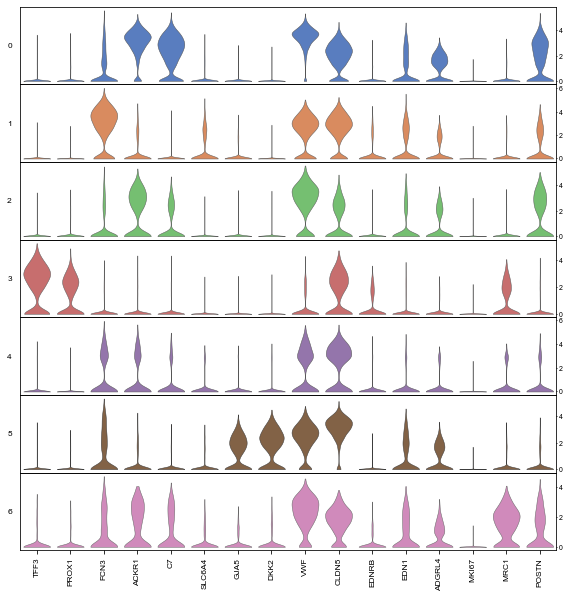

In [48]:
genes = [
    "TFF3", "PROX1", "FCN3", "ACKR1", "C7", "SLC6A4", 
    "GJA5", "DKK2", "VWF", "CLDN5", "EDNRB", "EDN1", "ADGRL4",
    "MKI67", "MRC1", "POSTN"
]
ax = sc.pl.stacked_violin(
    ds3,
    genes,
    groupby="leiden",
    rotation=90,
    figsize=(10, 10),
    show=False
);

In [50]:
names = pd.Series([
    "Bronchial vessel", # 0 
    "Capillary", # 1 
    "Endothelial-1", # 2 
    "Lymphatic", # 3 
    "Endothelial-2", # 4 
    "Artery", # 5
    "Macrophages", # 6 
])

In [51]:
ds3.obs["cluster"] = names[ds3.obs.leiden.astype(int)].values

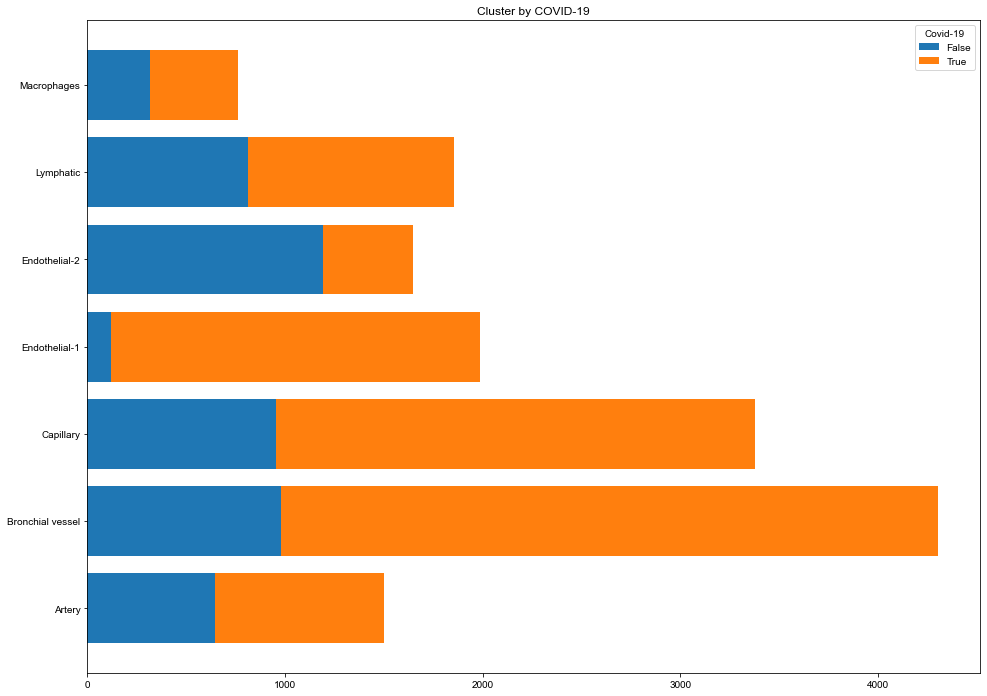

In [52]:
sc_utils.plot_composition(ds3, "cluster", "COVID-19")

In [53]:
ax = sc.pl.umap(
    ds3, 
    color="cluster", 
    size=15, 
    show=False, 
    legend_loc="on data",
    legend_fontsize=18, 
    legend_fontweight="normal",
#     legend_fontoutline=5
)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_title("")
ax.figure.tight_layout()
ax.figure.savefig("plots/31endo-umap.pdf")

... storing 'cluster' as categorical


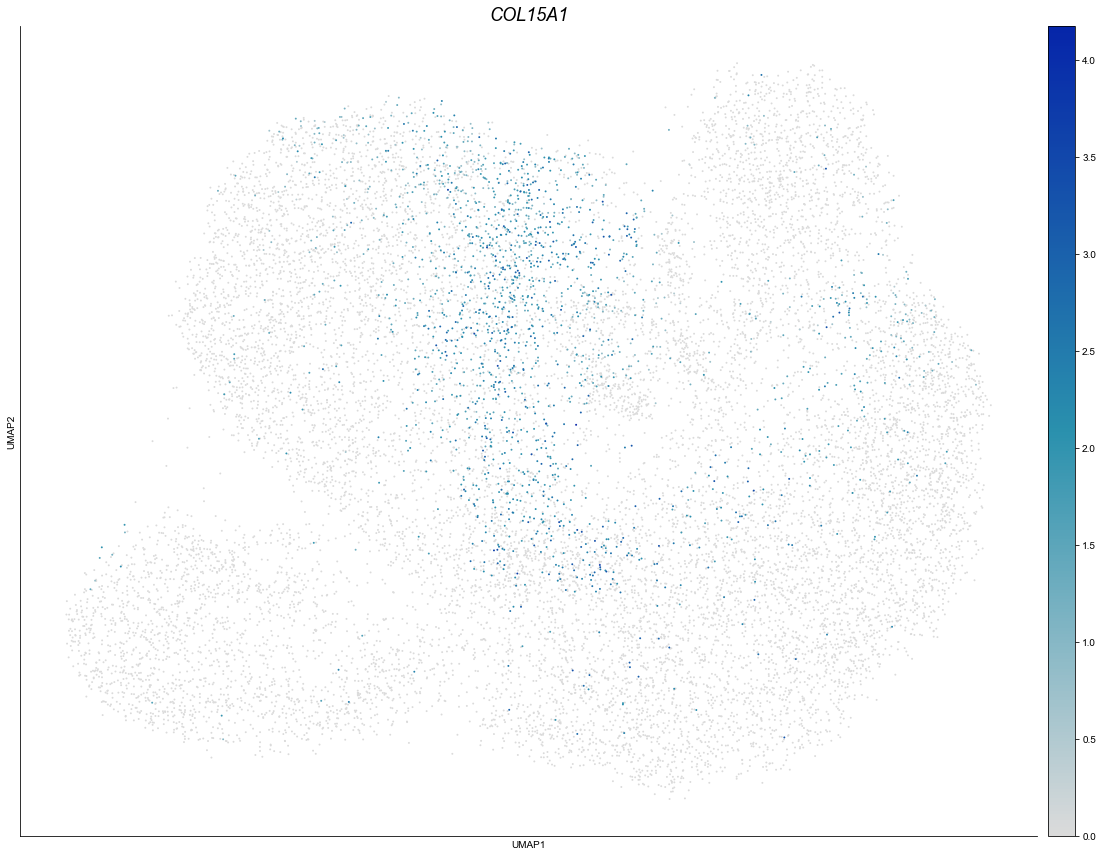

In [54]:
ax = sc.pl.umap(
    ds3, 
    color="COL15A1", 
    size=15, 
    show=False, 
    legend_loc="on data",
    legend_fontsize=12, 
    legend_fontweight="normal",
    legend_fontoutline=5,
    cmap=sc_utils.expr_colormap()
)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_title("COL15A1", fontstyle="italic", fontsize=18)
ax.figure.tight_layout()
ax.figure.savefig("plots/32endo_col15a1.pdf")

## DEGs between COVID+ and COVID– in each cluster

In [58]:
ds4 = ds3.copy()

In [59]:
ds4.obs["COVID-19"] = ds4.obs["COVID-19"].astype(str).map({"True": "COVID+", "False": "COVID-"}).astype("category").values

In [66]:
result = []
for cl in ds4.obs.cluster.unique():
    ds_slice = ds4[ds4.obs.cluster == cl, :]
    cnt = ds_slice.obs["COVID-19"].value_counts()[0] / ds_slice.shape[0]
    if cnt < 0.05 or cnt > 0.95:
        continue
    sc.tl.rank_genes_groups(ds_slice, groupby="COVID-19", method="wilcoxon")
    markers = sc_utils.get_markers(ds_slice, "COVID-19")
    markers.loc[markers.cluster == "COVID-", "avg_logFC"] *= -1
    markers["COVID"] = markers.cluster
    markers.cluster = cl
    markers = markers.loc[:, ["cluster", "COVID", "gene", "avg_logFC", "pct.1", "pct.2", "p_val_adj"]]
    result.append(markers.sort_values("avg_logFC"))

Trying to set attribute `.uns` of view, copying.


0.5619612068965517


Trying to set attribute `.uns` of view, copying.


0.9386317907444668


Trying to set attribute `.uns` of view, copying.


0.716696269982238


Trying to set attribute `.uns` of view, copying.


0.7720195212642342


Trying to set attribute `.uns` of view, copying.


0.5703802535023349


Trying to set attribute `.uns` of view, copying.


0.275820170109356


Trying to set attribute `.uns` of view, copying.


0.5821287779237845


In [65]:
all_degs = pd.concat(result, ignore_index=True)
all_degs.sort_values(["cluster", "avg_logFC"]).to_csv("14endo-covid-markers.csv")

## Plot genes mentioned in the paper

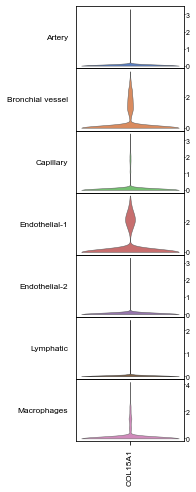

In [9]:
paper_genes = [
    "COL15A1"
]

ax = sc.pl.stacked_violin(
    ds3,
    paper_genes,
    groupby="cluster",
    rotation=45,
    figsize=(2, 8),
    show=False
);

In [55]:
ds3.write_h5ad("../data/02dataset/14endo.h5ad")

In [56]:
markers.cluster = names[markers.cluster.astype(int)].values

In [57]:
markers.to_csv("../data/02dataset/14endo-markers.csv")